#                                       FAVORITA CORPORICO SALES PREDICTION

# AUTHOR :CHINMAY JOMRAJ(001822921)

# WHAT PROJECT IS ABOUT:

Brick-and-mortar grocery stores are always in a delicate dance with purchasing and sales forecasting. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leaving money on the table and customers fuming.

The problem becomes more complex as retailers add new locations with unique needs, new products, ever transitioning seasonal tastes, and unpredictable product marketing. Corporación Favorita, a large Ecuadorian-based grocery retailer, knows this all too well. They operate hundreds of supermarkets, with over 200,000 different products on their shelves.

Corporación Favorita has challenged the Kaggle community to build a model that more accurately forecasts product sales. They currently rely on subjective forecasting methods with very little data to back them up and very little automation to execute plans. They’re excited to see how machine learning could better ensure they please customers by having just enough of the right products at the right time

# HOW THE OBJECTIVE IS ACHEIVED
   Feature engineering:
   The data is dependent on various factors from various datasets. Thus various features are modified and new features are added.The features are identified for effective results with the help of various tests such as CHI-SQUARED, TTEST, Linear regression model.These features are further used in algorithms for prediction.
    Data clustering: The data is clustered for identification of relations between target and certain features.
    
    Prediction through regression:
    The actual unit sales are predicted with the help of certain Machine Learning Algorithms such as Random forst regression,Decision Tree Regression and Support Vector Regression.
    
    Prediction Through Classification:
    The target is classified into various classes by using a python fuvtion and these classes are predicted with the help of Random forest Classification, Support Vector Regression and Decision Tree Regression.
    
    Neural Network by Keras Regression:
    
    The unit sales are also predicted with the help of Neural network by using Keras Regressor for the better results.The loss of output is also calclated i.e.the root mean square value.
  

# THE APPROACH FOR THIS PROJECT IS AS FOLLOWS:

1)ACTUAL SALES PREDICTION{REGRESSION ALGORITHMS}

2)SALES RANGES PREDICTION{CLASSIFICATION ALGORITHMS}

3)CLUSTERING OF IMPORTANT DATA

4)USE OF NEURAL NETWORK FOR BETTER PREDICTION RESULTS

#                                        DATA IMPORTING AND MERGING

In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import gc

import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)
%matplotlib inline

#For statistical tests
import scipy.stats as st

#For formula notation (similar to R)
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

import operator
# import necessary modules
import numpy as np
import pandas as pd

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df  = pd.read_csv("train.csv")

C:\Users\CHINMAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [ ]:
#DATA IS SAMPLED THROUGH RANDOM SELECTION

In [7]:
df7  = df.sample(n=1000000)

In [ ]:
df7.head()

THE GIVEN DATA CONTAINS MULTIPLE FILES .So, will assimilate that data by using merge

In this project the dat is spread into multiple files and it consists of multiple different files.

So the data is logically fetched and the relationship is shown by consolidating required features into a single table or file.

In [9]:
dftrain = df7.copy()

train.csv
Training data, which includes the target unit_sales by date, store_nbr, and item_nbr and a unique id to label rows.
The target unit_sales can be integer (e.g., a bag of chips) or float (e.g., 1.5 kg of cheese).
Negative values of unit_sales represent returns of that particular item.
The onpromotion column tells whether that item_nbr was on promotion for a specified date and store_nbr.
Approximately 16% of the onpromotion values in this file are NaN.
NOTE: The training data does not include rows for items that had zero unit_sales for a store/date combination. There is no information as to whether or not the item was in stock for the store on the date, and teams will need to decide the best way to handle that situation. Also, there are a small number of items seen in the training data that aren't seen in the test data

In [10]:
dfitems  = pd.read_csv("items.csv")

Item metadata, including family, class, and perishable.
NOTE: Items marked as perishable have a score weight of 1.25; otherwise, the weight is 1.0.

In [11]:
dftest  = pd.read_csv("test.csv")

dftransactions  = pd.read_csv("transactions.csv")

The count of sales transactions for each date, store_nbr combination. Only included for the training data timeframe.

In [13]:
dfsample_submission  = pd.read_csv("sample_submission.csv")

A sample submission file in the correct format.
It is highly recommend you zip your submission file before uploading

In [14]:
dfstores  = pd.read_csv("stores.csv")

In [ ]:
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores

In [15]:
dfoil  = pd.read_csv("oil.csv")

In [16]:
dfholidays =pd.read_csv("holidays_events.csv")

In [17]:
dfoil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



Loading the Data and importing the necessary libraries:
The libraries that we will be needing are: 
Numpy : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
Pandas : Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
Matplotlib : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
 
Scikit-learn : Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.


In [18]:
dfjoin = pd.merge(dftrain, dfstores, on= "store_nbr")

In [19]:
dfjoin = pd.merge(dfjoin, dfitems, on= "item_nbr")

In [20]:
dfjoin = pd.merge(dfjoin, dfholidays, on= "date")

In [21]:
dfjoin = pd.merge(dfjoin, dfoil, on= "date")

In [22]:
dfjoin.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico
0,16059917,2013-12-26,49,1092008,1.000,NaN,Quito,Pichincha,A,11,BREAD/BAKERY,2712,1,Additional,National,Ecuador,Navidad+1,False,99.18
1,16044272,2013-12-26,36,179600,1.000,NaN,Libertad,Guayas,E,10,GROCERY I,1006,0,Additional,National,Ecuador,Navidad+1,False,99.18
2,16058045,2013-12-26,48,740728,6.000,NaN,Quito,Pichincha,A,14,GROCERY I,1072,0,Additional,National,Ecuador,Navidad+1,False,99.18
3,16027154,2013-12-26,13,740713,5.000,NaN,Latacunga,Cotopaxi,C,15,CLEANING,3032,0,Additional,National,Ecuador,Navidad+1,False,99.18
4,16033220,2013-12-26,23,583973,0.834,NaN,Ambato,Tungurahua,D,9,MEATS,2302,1,Additional,National,Ecuador,Navidad+1,False,99.18


#                                          FIELDS ENGINEERING AND ANALYSIS

First stage towards any analysis is that the data should be clean and appropriate.

Data cleaning is started with removal of null values.For that the dataset is checked for null values.

It is found that the null values are present in the onpromotion and dcoilwtico features.

In [23]:
dfjoin.isnull().sum()

id                 0
date               0
store_nbr          0
item_nbr           0
unit_sales         0
onpromotion    11838
city               0
state              0
type_x             0
cluster            0
family             0
class              0
perishable         0
type_y             0
locale             0
locale_name        0
description        0
transferred        0
dcoilwtico      9160
dtype: int64

We have onpromotion column so we conver it into numerical format for further processing of the data

In [24]:
dfjoin['onpromotion'] = dfjoin['onpromotion'].fillna(2)
dfjoin['onpromotion'] = dfjoin['onpromotion'].replace(True,1)
dfjoin['onpromotion'] = dfjoin['onpromotion'].replace(False,0)

In [25]:
dfjoin.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico
0,78057163,2016-05-03,2,317285,7.000,0,Quito,Pichincha,D,13,GROCERY II,1236,0,Event,National,Ecuador,Terremoto Manabi+17,False,43.65
1,78135541,2016-05-03,46,1062374,1.372,0,Quito,Pichincha,A,14,MEATS,2302,1,Event,National,Ecuador,Terremoto Manabi+17,False,43.65
2,78112812,2016-05-03,34,1047733,2.000,0,Guayaquil,Guayas,B,6,BEVERAGES,1124,0,Event,National,Ecuador,Terremoto Manabi+17,False,43.65
3,78115525,2016-05-03,36,949298,22.000,0,Libertad,Guayas,E,10,CLEANING,3020,0,Event,National,Ecuador,Terremoto Manabi+17,False,43.65
4,78113570,2016-05-03,34,1916579,7.000,0,Guayaquil,Guayas,B,6,BREAD/BAKERY,2712,1,Event,National,Ecuador,Terremoto Manabi+17,False,43.65


Here we will replace the nulll values with mean values.

In [ ]:
dfjoin["dcoilwtico"].sum()/(len(dfjoin["dcoilwtico"])-dfjoin["dcoilwtico"].count())

In [26]:
dfjoin["dcoilwtico"] = dfjoin["dcoilwtico"].replace(np.NaN,0)
dfjoin.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico
0,16059917,2013-12-26,49,1092008,1.000,2,Quito,Pichincha,A,11,BREAD/BAKERY,2712,1,Additional,National,Ecuador,Navidad+1,False,99.18
1,16044272,2013-12-26,36,179600,1.000,2,Libertad,Guayas,E,10,GROCERY I,1006,0,Additional,National,Ecuador,Navidad+1,False,99.18
2,16058045,2013-12-26,48,740728,6.000,2,Quito,Pichincha,A,14,GROCERY I,1072,0,Additional,National,Ecuador,Navidad+1,False,99.18
3,16027154,2013-12-26,13,740713,5.000,2,Latacunga,Cotopaxi,C,15,CLEANING,3032,0,Additional,National,Ecuador,Navidad+1,False,99.18
4,16033220,2013-12-26,23,583973,0.834,2,Ambato,Tungurahua,D,9,MEATS,2302,1,Additional,National,Ecuador,Navidad+1,False,99.18


In [27]:
dfjoin.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico
0,16059917,2013-12-26,49,1092008,1.000,2,Quito,Pichincha,A,11,BREAD/BAKERY,2712,1,Additional,National,Ecuador,Navidad+1,False,99.18
1,16044272,2013-12-26,36,179600,1.000,2,Libertad,Guayas,E,10,GROCERY I,1006,0,Additional,National,Ecuador,Navidad+1,False,99.18
2,16058045,2013-12-26,48,740728,6.000,2,Quito,Pichincha,A,14,GROCERY I,1072,0,Additional,National,Ecuador,Navidad+1,False,99.18
3,16027154,2013-12-26,13,740713,5.000,2,Latacunga,Cotopaxi,C,15,CLEANING,3032,0,Additional,National,Ecuador,Navidad+1,False,99.18
4,16033220,2013-12-26,23,583973,0.834,2,Ambato,Tungurahua,D,9,MEATS,2302,1,Additional,National,Ecuador,Navidad+1,False,99.18


In [28]:
dfg = dfjoin.copy()

# Since for continuous data predication ,machine learning algorithms need data to be in numerical format
# Thus we will change the data format for the few of the fields to integer

In [30]:
dfg['unit_sales'] = dfg['unit_sales'].astype(int)

In [31]:
dfjoin.dtypes

id               int64
date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion      int64
city            object
state           object
type_x          object
cluster          int64
family          object
class            int64
perishable       int64
type_y          object
locale          object
locale_name     object
description     object
transferred       bool
dcoilwtico     float64
dtype: object

In [32]:
dfg.dtypes

id               int64
date            object
store_nbr        int64
item_nbr         int64
unit_sales       int32
onpromotion      int64
city            object
state           object
type_x          object
cluster          int64
family          object
class            int64
perishable       int64
type_y          object
locale          object
locale_name     object
description     object
transferred       bool
dcoilwtico     float64
dtype: object

ANALYSING THE FIELDS WHICH AFFECTING THE TARGET

We will run tests on fieldQuestion 1A - Is there any statistically significant relation between STORE NUMBER and UNIT SALES of the stores ?
Null Hypothesis H0 = Store number and Unit sales are independent from each other.
Alternative Hypothesis HA =  Store number and Unit sales are not independent of each other. 
There is a relationship between thems one by one and determine its correlation with target


In [33]:
#For statistical tests
import scipy.stats as st

In [34]:
# Contingency table
ct = pd.crosstab(dfjoin['store_nbr'], dfjoin['unit_sales'])
ct

unit_sales,-494.0,-15.0,-3.1910000000000003,-1.0,-0.768,0.091,0.115,0.121,0.12300000000000001,0.146,...,663.0,985.0,1097.2,1122.769,1198.3239999999998,1207.333,1427.0,1450.0,1561.0,2323.0
store_nbr,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
st.chi2_contingency(ct)

(383281.6688575832,
 1.6628488348829065e-225,
 355577,
 array([[0.04128882, 0.02064441, 0.02064441, ..., 0.02064441, 0.02064441,
         0.02064441],
        [0.04733433, 0.02366716, 0.02366716, ..., 0.02366716, 0.02366716,
         0.02366716],
        [0.0523335 , 0.02616675, 0.02616675, ..., 0.02616675, 0.02616675,
         0.02616675],
        ...,
        [0.00431822, 0.00215911, 0.00215911, ..., 0.00215911, 0.00215911,
         0.00215911],
        [0.03436306, 0.01718153, 0.01718153, ..., 0.01718153, 0.01718153,
         0.01718153],
        [0.02491281, 0.0124564 , 0.0124564 , ..., 0.0124564 , 0.0124564 ,
         0.0124564 ]]))

SINCE THE P value IS MUCH LESSER THAN 0.05 , IT IS AFFECTING THE TARGET COLUMN

We will run tests on fieldQuestion 1A - Is there any statistically significant relation between ITEM NUMBER and UNIT SALES of the stores ?
Null Hypothesis H0 = Item number and Unit sales are independent from each other.
Alternative Hypothesis HA =  Item number and Unit sales are not independent of each other. 
There is a relationship between thems one by one and determine its correlation with target

In [36]:
ct = pd.crosstab(dfjoin['item_nbr'], dfjoin['unit_sales'])
ct

unit_sales,-10.363,-2.0,-1.0,0.11699999999999999,0.126,0.13,0.158,0.162,0.17300000000000001,0.18899999999999997,...,602.0,607.893,649.0,753.0,788.048,829.163,1138.0,1178.0,1349.0,1459.0
item_nbr,,,,,,,,,,,,,,,,,,,,,
96995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
st.chi2_contingency(ct)

(30977772.470760014,
 0.0,
 25428702,
 array([[4.94307228e-05, 4.94307228e-05, 3.95445783e-04, ...,
         4.94307228e-05, 4.94307228e-05, 4.94307228e-05],
        [4.11922690e-05, 4.11922690e-05, 3.29538152e-04, ...,
         4.11922690e-05, 4.11922690e-05, 4.11922690e-05],
        [2.47153614e-04, 2.47153614e-04, 1.97722891e-03, ...,
         2.47153614e-04, 2.47153614e-04, 2.47153614e-04],
        ...,
        [1.64769076e-05, 1.64769076e-05, 1.31815261e-04, ...,
         1.64769076e-05, 1.64769076e-05, 1.64769076e-05],
        [8.23845381e-06, 8.23845381e-06, 6.59076305e-05, ...,
         8.23845381e-06, 8.23845381e-06, 8.23845381e-06],
        [8.23845381e-06, 8.23845381e-06, 6.59076305e-05, ...,
         8.23845381e-06, 8.23845381e-06, 8.23845381e-06]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between Perishable and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [38]:
# Contingency table
ct = pd.crosstab(dfjoin['perishable'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(25672.650219450374,
 0.0,
 6477,
 array([[0.74501985, 0.74501985, 5.96015884, ..., 0.74501985, 0.74501985,
         0.74501985],
        [0.25498015, 0.25498015, 2.03984116, ..., 0.25498015, 0.25498015,
         0.25498015]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between state and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [39]:
# Contingency table
ct = pd.crosstab(dfjoin['state'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(94169.03306104556,
 0.9999999999961232,
 97155,
 array([[0.05570842, 0.05570842, 0.4456674 , ..., 0.05570842, 0.05570842,
         0.05570842],
        [0.01431843, 0.01431843, 0.11454746, ..., 0.01431843, 0.01431843,
         0.01431843],
        [0.01515052, 0.01515052, 0.12120413, ..., 0.01515052, 0.01515052,
         0.01515052],
        ...,
        [0.01716894, 0.01716894, 0.1373515 , ..., 0.01716894, 0.01716894,
         0.01716894],
        [0.04712396, 0.04712396, 0.37699165, ..., 0.04712396, 0.04712396,
         0.04712396],
        [0.04330955, 0.04330955, 0.34647641, ..., 0.04330955, 0.04330955,
         0.04330955]]))

SINCE THE P value IS GREATER THAN TARGET VALUE , IT IS NOT AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between ITEM NUMBER and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [40]:
# Contingency table
ct = pd.crosstab(dfjoin['type_x'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(31449.682263501378,
 2.2442330565602627e-115,
 25908,
 array([[0.21105271, 0.21105271, 1.68842168, ..., 0.21105271, 0.21105271,
         0.21105271],
        [0.14358801, 0.14358801, 1.14870409, ..., 0.14358801, 0.14358801,
         0.14358801],
        [0.20563181, 0.20563181, 1.64505446, ..., 0.20563181, 0.20563181,
         0.20563181],
        [0.37388575, 0.37388575, 2.99108599, ..., 0.37388575, 0.37388575,
         0.37388575],
        [0.06584172, 0.06584172, 0.52673378, ..., 0.06584172, 0.06584172,
         0.06584172]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between type_y and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [41]:
# Contingency table
ct = pd.crosstab(dfjoin['type_y'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(26196.420004482286,
 0.1028812595717772,
 25908,
 array([[0.13400669, 0.13400669, 1.07205352, ..., 0.13400669, 0.13400669,
         0.13400669],
        [0.01584255, 0.01584255, 0.12674037, ..., 0.01584255, 0.01584255,
         0.01584255],
        [0.19630588, 0.19630588, 1.57044702, ..., 0.19630588, 0.19630588,
         0.19630588],
        [0.60584765, 0.60584765, 4.84678124, ..., 0.60584765, 0.60584765,
         0.60584765],
        [0.04799723, 0.04799723, 0.38397786, ..., 0.04799723, 0.04799723,
         0.04799723]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS NOT AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between cluster and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [42]:
# Contingency table
ct = pd.crosstab(dfjoin['cluster'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(121931.2047229354,
 4.694288e-317,
 103632,
 array([[0.05955578, 0.05955578, 0.47644626, ..., 0.05955578, 0.05955578,
         0.05955578],
        [0.0352853 , 0.0352853 , 0.28228238, ..., 0.0352853 , 0.0352853 ,
         0.0352853 ],
        [0.0932181 , 0.0932181 , 0.74574484, ..., 0.0932181 , 0.0932181 ,
         0.0932181 ],
        ...,
        [0.07173222, 0.07173222, 0.57385774, ..., 0.07173222, 0.07173222,
         0.07173222],
        [0.0180175 , 0.0180175 , 0.14413999, ..., 0.0180175 , 0.0180175 ,
         0.0180175 ],
        [0.02286171, 0.02286171, 0.18289367, ..., 0.02286171, 0.02286171,
         0.02286171]]))


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between cluster and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [43]:
# Contingency table
ct = pd.crosstab(dfjoin['city'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(134337.23808857403,
 0.9993868036796757,
 136017,
 array([[0.04330955, 0.04330955, 0.34647641, ..., 0.04330955, 0.04330955,
         0.04330955],
        [0.01866834, 0.01866834, 0.14934669, ..., 0.01866834, 0.01866834,
         0.01866834],
        [0.02051375, 0.02051375, 0.16411   , ..., 0.02051375, 0.02051375,
         0.02051375],
        ...,
        [0.01515052, 0.01515052, 0.12120413, ..., 0.01515052, 0.01515052,
         0.01515052],
        [0.01716894, 0.01716894, 0.1373515 , ..., 0.01716894, 0.01716894,
         0.01716894],
        [0.04712396, 0.04712396, 0.37699165, ..., 0.04712396, 0.04712396,
         0.04712396]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between family and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [44]:
# Contingency table
ct = pd.crosstab(dfjoin['family'], dfjoin['unit_sales'])
st.chi2_contingency(ct)

(328080.1058554725,
 0.0,
 207264,
 array([[2.78459739e-03, 2.78459739e-03, 2.22767791e-02, ...,
         2.78459739e-03, 2.78459739e-03, 2.78459739e-03],
        [8.23845381e-06, 8.23845381e-06, 6.59076305e-05, ...,
         8.23845381e-06, 8.23845381e-06, 8.23845381e-06],
        [1.32639106e-03, 1.32639106e-03, 1.06111285e-02, ...,
         1.32639106e-03, 1.32639106e-03, 1.32639106e-03],
        ...,
        [6.30736023e-02, 6.30736023e-02, 5.04588819e-01, ...,
         6.30736023e-02, 6.30736023e-02, 6.30736023e-02],
        [5.19022590e-04, 5.19022590e-04, 4.15218072e-03, ...,
         5.19022590e-04, 5.19022590e-04, 5.19022590e-04],
        [1.86189056e-03, 1.86189056e-03, 1.48951245e-02, ...,
         1.86189056e-03, 1.86189056e-03, 1.86189056e-03]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


We will run tests on fieldQuestion 1A - Is there any statistically significant relation between Date and UNIT SALES of the stores ? Null Hypothesis H0 = Item number and Unit sales are independent from each other. Alternative Hypothesis HA = Item number and Unit sales are not independent of each other. There is a relationship between thems one by one and determine its correlation with target

In [45]:
# Contingency table
ct = pd.crosstab(dfjoin['date'], dfjoin['unit_sales'])
ct

unit_sales,-10.363,-2.0,-1.0,0.11699999999999999,0.126,0.13,0.158,0.162,0.17300000000000001,0.18899999999999997,...,602.0,607.893,649.0,753.0,788.048,829.163,1138.0,1178.0,1349.0,1459.0
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-02-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-02-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-04-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-04-29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-05-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-06-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
st.chi2_contingency(ct)

(1248958.3610921758,
 0.0,
 1159383,
 array([[4.11922690e-05, 4.11922690e-05, 3.29538152e-04, ...,
         4.11922690e-05, 4.11922690e-05, 4.11922690e-05],
        [2.64454367e-03, 2.64454367e-03, 2.11563494e-02, ...,
         2.64454367e-03, 2.64454367e-03, 2.64454367e-03],
        [2.53744377e-03, 2.53744377e-03, 2.02995502e-02, ...,
         2.53744377e-03, 2.53744377e-03, 2.53744377e-03],
        ...,
        [6.30241716e-03, 6.30241716e-03, 5.04193373e-02, ...,
         6.30241716e-03, 6.30241716e-03, 6.30241716e-03],
        [6.70610140e-03, 6.70610140e-03, 5.36488112e-02, ...,
         6.70610140e-03, 6.70610140e-03, 6.70610140e-03],
        [7.14273945e-03, 7.14273945e-03, 5.71419156e-02, ...,
         7.14273945e-03, 7.14273945e-03, 7.14273945e-03]]))

SINCE THE P value IS MUCH LESSER THAN TARGET VALUE , IT IS AFFECTING THE TARGET


Here promo sales and no promo sales features share statistical relationship. Thus its collinearity with the target can be find out with TTEST.

In [47]:
promo_sales = dfjoin[dfjoin['onpromotion'] == 1.0]['unit_sales']
nopromo_sales = dfjoin[dfjoin['onpromotion'] == 0.0]['unit_sales']
st.ttest_ind(promo_sales, nopromo_sales, equal_var = False)

Ttest_indResult(statistic=16.54170437127276, pvalue=1.0662887462681765e-60)

SINCE THERE IS STATISTICAL RELATION BETWEEN THE COLUMNS WE CAN USE THE TTEST TO DETERMINE THE RELATIONSHIP WITH THE TARGET

WE WILL USE THE LINEAR REGRESSION TO DETERMINE THE DEPENDENCY OF THE COLUMN SINCE THE DATA TYPE OF BOTH THE FIELD IS CONTINUOUS

In [48]:
lm0 = smf.ols(formula = 'unit_sales ~dcoilwtico ', data = dfjoin).fit()

In [49]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8368
Date:                Sat, 21 Apr 2018   Prob (F-statistic):              0.360
Time:                        14:19:22   Log-Likelihood:            -5.3139e+05
No. Observations:              121382   AIC:                         1.063e+06
Df Residuals:                  121380   BIC:                         1.063e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3131      0.125     66.493      0.0

SINCE p value IS GREATER THAN 0.05,THERE IS NO RELATIONSHIP BETWEEN THE GIVEN PREDICTOR FIELD AND THE TARGET FIELD

In [50]:
lm0 = smf.ols(formula = 'unit_sales ~item_nbr', data = dfjoin).fit()

In [51]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     32.68
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           1.09e-08
Time:                        14:19:40   Log-Likelihood:            -5.3137e+05
No. Observations:              121382   AIC:                         1.063e+06
Df Residuals:                  121380   BIC:                         1.063e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8164      0.119     65.941      0.0

THERE IS A STRONG RELATIONSHIP BETWEEN THE PREDICTOR COLUMN AND AND THE TARGET COLUMN


FIELD ENGINEERING AND DATA PROCESSING



According to chi-squared test, TTEST and Linear regression , I have figured it out about the depenedency and collinearity of features with the target column. 

In [52]:
dfg.dtypes

id               int64
date            object
store_nbr        int64
item_nbr         int64
unit_sales       int32
onpromotion      int64
city            object
state           object
type_x          object
cluster          int64
family          object
class            int64
perishable       int64
type_y          object
locale          object
locale_name     object
description     object
transferred       bool
dcoilwtico     float64
dtype: object

In [ ]:
dfo  = dfg.copy()

In [39]:
dfo.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico
0,16059917,2013-12-26,49,1092008,1,2,Quito,Pichincha,A,11,BREAD/BAKERY,2712,1,Additional,National,Ecuador,Navidad+1,False,99.18
1,16044272,2013-12-26,36,179600,1,2,Libertad,Guayas,E,10,GROCERY I,1006,0,Additional,National,Ecuador,Navidad+1,False,99.18
2,16058045,2013-12-26,48,740728,6,2,Quito,Pichincha,A,14,GROCERY I,1072,0,Additional,National,Ecuador,Navidad+1,False,99.18
3,16027154,2013-12-26,13,740713,5,2,Latacunga,Cotopaxi,C,15,CLEANING,3032,0,Additional,National,Ecuador,Navidad+1,False,99.18
4,16033220,2013-12-26,23,583973,0,2,Ambato,Tungurahua,D,9,MEATS,2302,1,Additional,National,Ecuador,Navidad+1,False,99.18


The given code is referred from https://www.kaggle.com/sohinibhattacharya86/predict-grocery-sales-rf-xgb

HERE WE WILL USE THE CATCODES TO CONVERT THE CATEGORICAL DATA INTO NUMERICAL VALUES FOR IMPLEMENTATION IN ALGORITHMS

In [ ]:
https://www.kaggle.com/dongxu027/time-series-ets-starter-lb-0-556

In [40]:

dfo['city'] = dfo['city'].astype('category')
dfo['state'] = dfo['state'].astype('category')
dfo['type_x'] = dfo['type_x'].astype('category')

#dfo['family_x'] = dfo['family_x'].astype('category')
dfo['family'] = dfo['family'].astype('category')
dfo['locale'] = dfo['locale'].astype('category')
dfo['locale_name'] = dfo['locale_name'].astype('category')
dfo['description'] = dfo['description'].astype('category')

cat_columns = dfo.select_dtypes(['category']).columns
dfo[cat_columns] = dfo[cat_columns].apply(lambda x: x.cat.codes)

In [41]:
dfo['type_y'] = dfo['type_y'].astype('category')
cat_columns = dfo.select_dtypes(['category']).columns
dfo[cat_columns] = dfo[cat_columns].apply(lambda x: x.cat.codes)

In [42]:
dfo['dcoilwtico'] = dfo['dcoilwtico'].astype(int)

In [43]:
dfo.dtypes

id              int64
date           object
store_nbr       int64
item_nbr        int64
unit_sales      int32
onpromotion     int64
city             int8
state            int8
type_x           int8
cluster         int64
family           int8
class           int64
perishable      int64
type_y           int8
locale           int8
locale_name      int8
description      int8
transferred      bool
dcoilwtico      int32
dtype: object

HERE WE SEPARATE THE DATA SO THAT IT CAN BE EFFECTIVELY BE USED IN THE ML ALGORITHMS.DATA FORMAT IS CONVERTED INTO DATE TIME STAMP FORMAT AND THEN SEPARATING DATE, MONTH AND YEAR

In [44]:
dfo['date'] =pd.to_datetime(dfo['date'],format ="%Y-%m-%d")

In [45]:
dfo['months'] = dfo['date'].apply(lambda x : x.month)

In [46]:
dfo['year'] = dfo['date'].apply(lambda x : x.year)

In [47]:
dfo['day'] = dfo['date'].apply(lambda x : x.day)

In [48]:
dfo.drop('date', axis=1, inplace=True)

In [49]:
dfo.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,...,perishable,type_y,locale,locale_name,description,transferred,dcoilwtico,months,year,day
0,16059917,49,1092008,1,2,18,12,0,11,5,...,1,0,1,4,39,False,99,12,2013,26
1,16044272,36,179600,1,2,11,6,4,10,12,...,0,0,1,4,39,False,99,12,2013,26
2,16058045,48,740728,6,2,18,12,0,14,12,...,0,0,1,4,39,False,99,12,2013,26
3,16027154,13,740713,5,2,10,3,2,15,7,...,0,0,1,4,39,False,99,12,2013,26
4,16033220,23,583973,0,2,0,15,3,9,24,...,1,0,1,4,39,False,99,12,2013,26


In [50]:
dfn  = dfo.copy()

In [70]:
dfn.to_csv('out88.csv')

In [51]:
dfr = dfn.copy()

In [52]:
dfx = dfn.copy()

HERE I HAVE CATEGORIZED THE TARGET INTO CLASSES AND RANGES .FURTHER THE RANGES ARE ALSO PREDICTED WITH VARIOUS CLASSIFICATION ALGORITHMS.FOR PREDICTION OF THE SALES RANGES WE WILL CONVERT THE TARGET COLUMN INTO CATEGORICAL FORM

In [68]:
new=[]

for value in dfx["unit_sales"]:
    if value < 0:
        new.append(1)
    elif value <100:
        new.append(2)
    elif value <500:
        new.append(3)
    elif value <1000:
        new.append(5)
    elif value <2000:
        new.append(6)
    else: new.append(7)
dfx['unit_salesnew']=new       

In [69]:
dfx.drop('unit_sales', axis=1, inplace=True)

In [71]:
dfx.head()

,id,store_nbr,item_nbr,onpromotion,city,state,type_x,cluster,family,class,...,type_y,locale,locale_name,description,transferred,dcoilwtico,months,year,day,unit_salesnew
0,78057163,2,317285,0,18,12,3,13,13,1236,...,2,1,4,59,False,43,5,2016,3,2
1,78135541,46,1062374,0,18,12,0,14,24,2302,...,2,1,4,59,False,43,5,2016,3,2
2,78112812,34,1047733,0,8,6,1,6,3,1124,...,2,1,4,59,False,43,5,2016,3,2
3,78115525,36,949298,0,11,6,4,10,7,3020,...,2,1,4,59,False,43,5,2016,3,2
4,78113570,34,1916579,0,8,6,1,6,5,2712,...,2,1,4,59,False,43,5,2016,3,2


In [76]:
dfx.to_csv('out99.csv')

In [72]:
dfx.dtypes

id               int64
store_nbr        int64
item_nbr         int64
onpromotion      int64
city              int8
state             int8
type_x            int8
cluster          int64
family            int8
class            int64
perishable       int64
type_y            int8
locale            int8
locale_name       int8
description       int8
transferred       bool
dcoilwtico       int32
months           int64
year             int64
day              int64
unit_salesnew    int64
dtype: object

In [73]:
dfo.dtypes

id             int64
store_nbr      int64
item_nbr       int64
unit_sales     int32
onpromotion    int64
city            int8
state           int8
type_x          int8
cluster        int64
family          int8
class          int64
perishable     int64
type_y          int8
locale          int8
locale_name     int8
description     int8
transferred     bool
dcoilwtico     int32
months         int64
year           int64
day            int64
dtype: object

# PREDICTION OF SALES UNITS BY USING REGRESSION ALGORITHMS

In [53]:
p = dfo.iloc[:,[1,2,4,6,7,8,9,12,18,19,20]].values

In [54]:
t = dfo.iloc[:,3].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(p,t,test_size=0.2,random_state=0)

DATA IS SCALED FOR BETTER OUTPUT 

In [78]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain  = sc_x.fit_transform(xtrain)
xtest  =sc_x.fit_transform(xtest)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


RANDOMFOREST REGRESSION:

The code is reffred from :https://www.kaggle.com/dongxu027/time-series-ets-starter-lb-0-556

Here I have tried the Random Forest regression with various combinationation of n_estimators and random_state and then found the output till get the appropriate results.
With the following combinations of inputs and parameters I have got best results.

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor  = RandomForestRegressor(n_estimators  = 300, random_state = 0)
regressor.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default)

In [81]:
ypred = regressor.predict(xtest)

In [82]:
ypred

array([7.33666667, 3.76333333, 6.69666667, ..., 9.35333333, 5.32666667,
       5.92      ])

In [83]:
import matplotlib.pyplot as plt

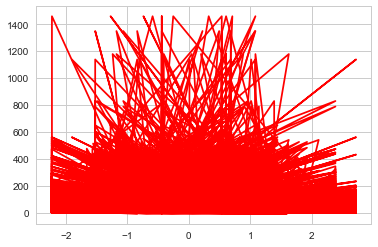

In [84]:
plt.plot(xtrain,ytrain,color='red')

plt.show()

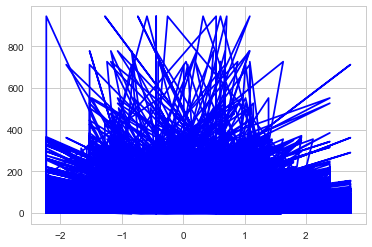

In [85]:
plt.plot(xtrain,regressor.predict(xtrain),color='blue')

plt.show()

The red graph reprersents the actual unit sales while later graph shows the prdicted output

From the visual graphs we can say that the the actual unit sales and predicted output follows the similar trend 

SINCE THE ACTUAL GRAPH AND PREDICTED GRAPH IS MATCHING WE CAN SAY THAT THE RESULT ACCURACY IS ACHEIVED

DECISIONTREEREGRESSOR


Here I have tried the Decision Tree  regression with various combinationation of n_estimators and random_state and then found the output till get the appropriate results. With the following combinations of inputs and parameters I have got best results.

Decision Tree - Regression
Decision tree builds regression or classification models in the form of a tree structure. It brakes down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor1  = DecisionTreeRegressor(random_state = 0)
regressor1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

The target unit sales are find out as follows:

In [87]:
ypred1 = regressor1.predict(xtest)

In [88]:
ypred1

array([9., 2., 2., ..., 9., 7., 2.])

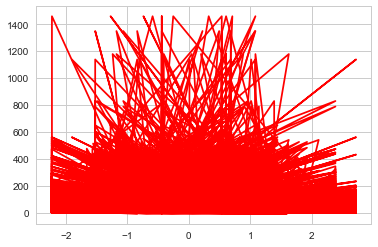

In [89]:
plt.plot(xtrain,ytrain,color='red')

plt.show()

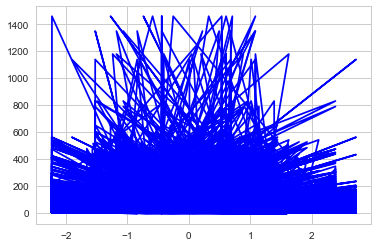

In [90]:
plt.plot(xtrain,regressor1.predict(xtrain),color='blue')

plt.show()


The red graph reprersents the actual unit sales while later graph shows the prdicted output


From the visual graphs we can say that the the actual unit sales and predicted output follows the similar trend


SINCE THE ACTUAL GRAPH AND PREDICTED GRAPH IS MATCHING WE CAN SAY THAT THE RESULT ACCURACY IS ACHEIVED

In [ ]:
The graph of actual column and predicted column is same.Thus accuracy is acheived

SUPPORT VECTOR REGRESSION

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels


Here I have tried the Support Vector regression with various combinationation of kernel and then found the output till get the appropriate results. With the following combinations of inputs and parameters I have got best results.

In [91]:
from sklearn.svm import SVR 
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(xtrain,ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

The unit sales are predicted as follows:

In [96]:
ypred2 = regressor2.predict(xtest)

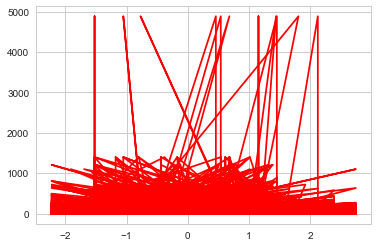

In [97]:
plt.plot(xtrain,ytrain,color='red')

plt.show()

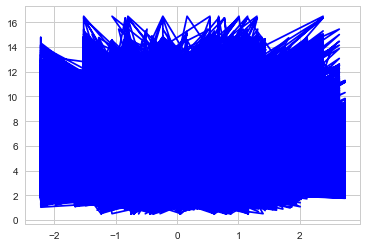

In [98]:
plt.plot(xtrain,regressor2.predict(xtrain),color='blue')

plt.show()

From the graph visuals we can say that the predicted results are matched with actual one.

In [ ]:
####################################################CLUSTERING#####################################

# CLUSTERING


K-means (MacQueen, 1967) is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed a priori. The main idea is to define k centroids, one for each cluster. These centroids shoud be placed in a cunning way because of different location causes different result. So, the better choice is to place them as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. At this point we need to re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new centroid. A loop has been generated. As a result of this loop we may notice that the k centroids change their location step by step until no more changes are done. In other words centroids do not move any more.
Finally, this algorithm aims at minimizing an objective function, in this case a squared error function.
 

 

We will find out the trend and pattern of variation  of years in variation with target. 

In [99]:
x1= dfo.iloc[:,[19,3]].values

In [100]:
from sklearn.cluster import KMeans

In [101]:
wcss=[]

The following method is used to find out the number of clusters should be included. The method is called as Elbow method.

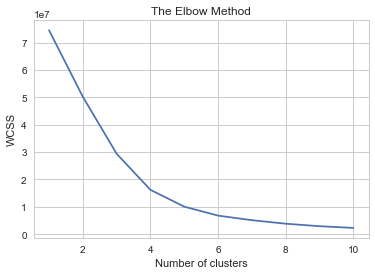

In [102]:
for i in range(1,11):
    kmeans  = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300,n_init  = 10, random_state =0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow method we can say that the number of clusters will be 4

In [103]:
kmeans  = KMeans(n_clusters = 4, init ='k-means++', max_iter =300, n_init = 10, random_state = 0)

In [104]:
y_kmeans = kmeans.fit_predict(x1)

In [105]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

Text(0,0.5,'unit sales')

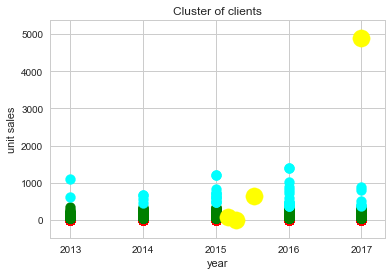

In [106]:
plt.scatter(x1[y_kmeans == 0,0], x1[y_kmeans ==0,1], s=100, c ='red', label = 'cluster1')
plt.scatter(x1[y_kmeans == 1,0], x1[y_kmeans ==1,1], s=100, c ='blue', label = 'cluster')
plt.scatter(x1[y_kmeans == 2,0], x1[y_kmeans ==2,1], s=100, c ='green', label = 'cluster')
plt.scatter(x1[y_kmeans == 3,0], x1[y_kmeans ==3,1], s=100, c ='cyan', label = 'cluster1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300,c='yellow',label  = 'Centroids')
plt.title('Cluster of clients')
plt.xlabel('year')
plt.ylabel('unit sales')

In [ ]:
#################################################CLUSTERING THE DATA OF UNIT SALES AND STORE CLUSTERS

We will find out the trend and pattern of variation  of clusters in variation with target. 

In [107]:
x2= dfo.iloc[:,[1,3]].values

In [108]:
from sklearn.cluster import KMeans

In [109]:
wcss1=[]


The following method is used to find out the number of clusters should be included. The method is called as Elbow method.

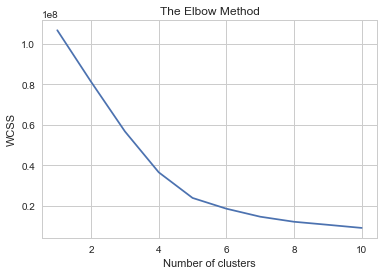

In [110]:
for i in range(1,11):
    kmeans1  = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300,n_init  = 10, random_state =0)
    kmeans1.fit(x2)
    wcss1.append(kmeans1.inertia_)
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
kmeans1  = KMeans(n_clusters = 4, init ='k-means++', max_iter =300, n_init = 10, random_state = 0)

In [112]:
y_kmeans1 = kmeans1.fit_predict(x2)

Text(0,0.5,'cluster')

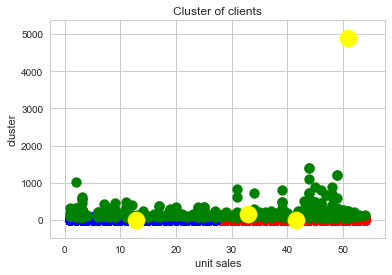

In [113]:
plt.scatter(x2[y_kmeans1 == 0,0], x2[y_kmeans1 ==0,1], s=100, c ='red', label = 'cluster1')
plt.scatter(x2[y_kmeans1 == 1,0], x2[y_kmeans1 ==1,1], s=100, c ='blue', label = 'cluster2')
plt.scatter(x2[y_kmeans1 == 2,0], x2[y_kmeans1 ==2,1], s=100, c ='green', label = 'cluster3')
plt.scatter(x2[y_kmeans1 == 3,0], x2[y_kmeans1 ==3,1], s=100, c ='cyan', label = 'cluster4')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=300,c='yellow',label  = 'Centroids')
plt.title('Cluster of clients')
plt.xlabel('unit sales')
plt.ylabel('cluster')

In [ ]:
########################################################PRDEICTION OF SALES RANGES###########################################

# PREDICTION OF SALES RANGES BY USING CLASSIFICATION ALGORITHMS 

In [115]:
 j= dfx.iloc[:,[1,2,3,4,5,17,18,19]].values

In [116]:
k = dfo.iloc[:,[20]].values

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(j,k,test_size=0.2,random_state=0)

SCALING THE DATA FOR BETTER OUTPUT

In [120]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain1  = sc_x.fit_transform(xtrain1)
xtest1  =sc_x.fit_transform(xtest1)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


SUPPORT VECTOR MACHINE:



Advantages:
Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. 

Common kernels are provided, but it is also possible to specify custom kernels.

Here I have tried the Support Vector Machine with various combinationation of n_estimators and random_state and then found the output till get the appropriate results. With the following combinations of inputs and parameters I have got best results.

In [121]:
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf')
classifier.fit(xtrain1,ytrain1)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
y_pred2 = classifier.predict(xtest1)

In [123]:
from sklearn.metrics import cohen_kappa_score

In [124]:
cohen_kappa_score(ytest1,y_pred2)

0.9484955135270048

WITH THE SUPPORT VECTOR MACHINE I ABLE ACHEIVE 94% ACCURACY FOR PREDICTION OF SALES RANGES

Random Forest Classification

Random Forests are considered for classification of multisource remote sensing and geographic data. Various ensemble classification methods have been proposed in recent years. These methods have been proven to improve classification accuracy considerably. The most widely used ensemble methods are boosting and bagging. Boosting is based on sample re-weighting but bagging uses bootstrapping. The Random Forest classifier uses bagging, or bootstrap aggregating, to form an ensemble of classification and regression tree (CART)-like classifiers. In addition, it searches only a random subset of the variables for a split at each CART node, in order to minimize the correlation between the classifiers in the ensemble. This method is not sensitive to noise or overtraining, as the resampling is not based on weighting. Furthermore, it is computationally much lighter than methods based on boosting and somewhat lighter than simple bagging.

Here I have tried the Random Forest Classification with various combinationation of n_estimators and random_state and then found the output till get the appropriate results. With the following combinations of inputs and parameters I have got best results.

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion  = 'entropy',random_state = 0)
classifier1.fit(xtrain1,ytrain1)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [128]:
y_pred3 = classifier1.predict(xtest1)

In [129]:
from sklearn.metrics import cohen_kappa_score

0.999224515582536

WITH THE SUPPORT VECTOR MACHINE I ABLE ACHEIVE 94% ACCURACY FOR PREDICTION OF SALES RANGES

DECISION TREE CLASSIFICATION

The classification technique is a systematic approach to build classification models from an input dat set. For example, decision tree classifiers, rule-based classifiers, neural networks, support vector machines, and naive Bayes classifiers are different technique to solve a classification problem. Each technique adopts a learning algorithm to identify a model that best fits the relationshio between the attribute set and class label of the input data. Therefore, a key objective of the learning algorithm is to build prdictive model that accurately predict the class labels of previously unkonw records.

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier2  = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier2.fit(xtrain1,ytrain1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [135]:
y_pred4 = classifier2.predict(xtest1)

In [136]:
from sklearn.metrics import cohen_kappa_score 

In [137]:
cohen_kappa_score(ytest1,y_pred4)

1.0

WITH THE DECISION TREE CLASSIFICATION,I ABLE ACHEIVE 94% ACCURACY FOR PREDICTION OF SALES RANGES

NEAURAL NETWORK:

In information technology, a neural network is a system of hardware and/or software patterned after the operation of neurons in the human brain. Neural networks -- also called artificial neural networks -- are a variety of deep learning technologies.

I have implemented the neural network with the various combinitions of epochs, actication functions, loss functions, initializer and optimizers

With the following combinition I able to acheive better results.

In [138]:
import numpy
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\CHINMAY\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [144]:
Xr = dfr.iloc[:,[1,2,4,6,7,8,9,10,11,12,16,17,18,19,20]].values
yr = dfr.iloc[:, 3].values

Initially the sequatial model is found out and then it has provided to the keras regressor for the prediction of sales

In [62]:
def baseline_model():
    model  = Sequential()
    model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [147]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=10, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, Xr, yr, cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -1029.27 (1024.36) MSE


here we train our model and find the accuracy of the model with the help of Rout Mean Square loss value

# REFERENCES

REFRENECES:
    1)https://www.youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v
    
    2)https://stackoverflow.com/questions/6160495/support-vector-machines-a-simple-explanation
    
    3)https://www.udemy.com/machinelearning/learn/v4/overview


# STEPS TO RUN ON OTHER SYSTEMS:
    
1)DOWNLOAD ANACONDA NAVIGATOR

2)RUN JUPYTER NOTEBOOK THROUGH NAVIGATOR OR ANACONDA CMD

3) IN CMD TYPE 'JUPYTER NOTEBOOK'.

4)SAVE ALL THE DATASETS CSV IN THE SAME FOLDER OF NOTEBOOK AND GIVE ABSOLUTE PATHS

5)DOWNLOAD THE LIBRARIES LIKE KERAS AND TENSORFLOW BY USING

  1)PIP INSTALL KERAS
  
  2)PIP INSTALL TENSORFLOW
  
  3)PIP INSTALL THEANO

# STATEMENT FOR LICENSE

In [ ]:
The code in the document by CHINMAY JOMRAJ is licensed under the MIT License https://opensource.org/licenses/MIT

 

# KAGGLE SUMMARY AND EXTENSION:

In kaggle kernles, the the given problem statement is tackled by using some ML algorithms and neural networks.
Also in most of the kernles, the features are selected randomly.In many of the kernles only date feature is considered.
The notebooksI have referred are

 1)Time series ETS             https://www.kaggle.com/dongxu027/time-series-ets-starter-lb-0-556 
 
 2)Grocery Dirty XGBOOST,Arima https://www.kaggle.com/ambarish/grocery-eda-dirty-xgboost-arima-ets-prophet
 
 3)Predicted Grocery Sales RF  https://www.kaggle.com/sohinibhattacharya86/predict-grocery-sales-rf-xgb
 
 4)Shopping for favorita       https://www.kaggle.com/headsortails/shopping-for-insights-favorita-eda

However, I went on to implement few more approaches to handle the problem. I have used Decision Tree Regression ,Support Vector Regression and Keras Regression along with Random Forest Regression and also find out the accuracy of each model.
In order to improve the accuracy I have given emphasis on feature selection by implemeting CHI-SQUARED and TTEST. I have also classified the target into various ranges by using Python function and predicted those ranges.
I went on to implement the Classification algorithms like Support vector Machine, Random Forest Classification,Decision Tree Classification for prediction of the classified data.